# STAT 201 Project Proposal
## A Look into Salaries and Remote Work in the Data Science Field

## Introduction

### Background
Monetary compensation is a one of the key factors in employees’ response to job satisfaction questions along with education matching the role of an employee (Card et al., 2012; Lee & Sabharwal, 2014)

This serves as the motivation for this project with the goal being to provide open information about compensation and factors that can contribute to the amount of compensation those in the data science field can expect to receive. While this can be used for monetary gain, the root problem we hope to contribute to using this statistical analysis is to increase workplace satisfaction. At its heart, this project is meant for both employees and employers who can benefit from greater job satisfaction; this can create a work environment that is productive for employees (and employers to a certain extent) in and out of the workplace by influencing work-life balance. 


### Guiding Question
> Comparing full-time Data Analysts and Data Engineers, is there a *difference in medians* of salaries and *difference in proportions* of remote work?

### Dataset

The data used in this project was sourced from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries). It aggregated by [ai-jobs.net](https://ai-jobs.net), and contains both qualitative and quantitative observations we can harness, like the year the salary was paid, experience level, employment type, title, salary, remote ratio, company size, and company location.

Together, these variables help us achieve a more complete picture of the job market in the Data Science field.

## Preliminary Results

### Reading the Data

Kaggle does not allow datasets to be read directly from the website, so we downloaded the data to our repository and read it from there.

In [212]:
# TODO- MAKE SURE WE ARE USING ALL OF THESE DEPENDENCIES AND IF NOT, DELETE THE UNNEEDED ONES
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(scales)

# reading the data
salaries <- read.csv("https://raw.githubusercontent.com/ryanarnouk/stat-201-project/main/ds_salaries.csv") %>%
     select(!X) # index column

# preview the data
head(salaries)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
4,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
5,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L


### Cleaning and Wrangling Data

Since we are only comparing full-time Data Analysts and Data Engineers, we can filter out the unnecessary observations and select only the columns we need. We also recoded the ```remote_ratio``` values, so that they are more readable. The dataset uses numbers to specify meaning but we can change this to a text representation.

We stored this cleaned and wrangled data to an object named ```anlst_engr_sals```

In [247]:
anlst_engr <- salaries %>%
    filter(employment_type == "FT", job_title %in% c("Data Engineer", "Data Analyst")) %>%
    select(job_title, remote_ratio, salary_in_usd) %>%
    mutate(remote_ratio = recode(remote_ratio, `0` = "in_person", `50` = "hybrid", `100` = "remote"))

head(anlst_engr)

,job_title,remote_ratio,salary_in_usd
,<chr>,<chr>,<int>
1,Data Analyst,remote,72000
2,Data Analyst,remote,85000
3,Data Analyst,hybrid,8000
4,Data Engineer,remote,41689
5,Data Engineer,hybrid,47899
6,Data Engineer,in_person,33511


### Plots

First, lets look at the sample distributions of Data Analyst and Data Engineer salaries. We plotted them side-by-side, with a red vertical line showing the median salary for each category.

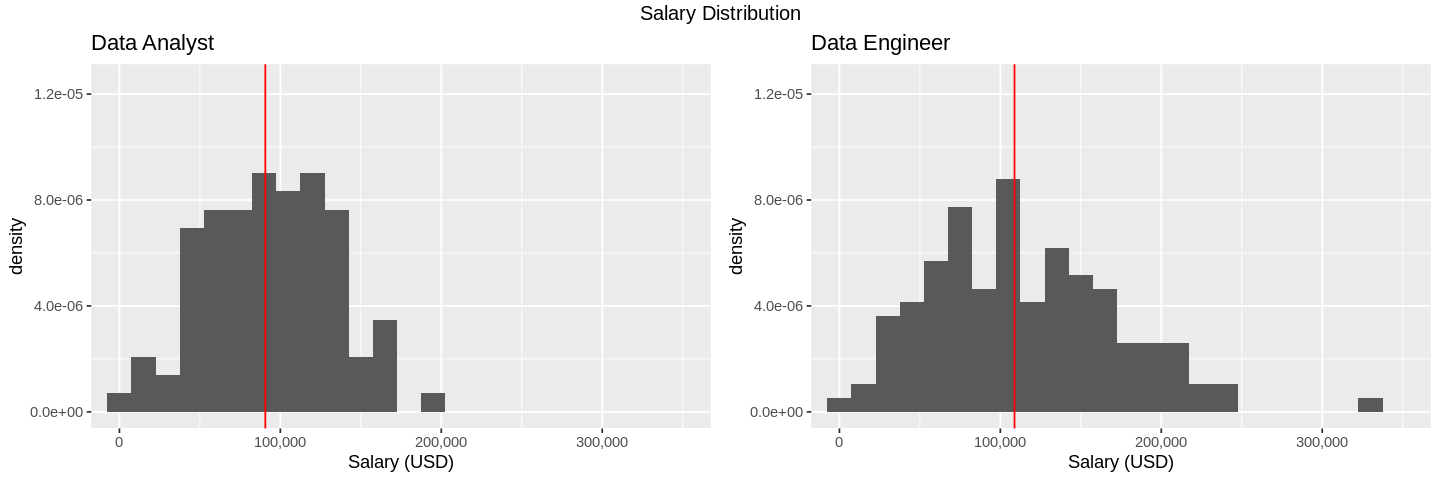

In [265]:
options(repr.plot.width = 12, repr.plot.height = 4)

anlst_dist <- anlst_engr %>%
    filter(job_title == "Data Analyst") %>%
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 15000) +
    geom_vline(xintercept = median(filter(anlst_engr, job_title == "Data Analyst")$salary_in_usd),
              color = "red") +
    labs(x = "Salary (USD)", title = "Data Analyst") +
    scale_x_continuous(labels = comma) +
    coord_cartesian(xlim = c(0, 350000), ylim = c(0, 1.25e-05))

engr_dist <- anlst_engr %>%
    filter(job_title == "Data Engineer") %>%
    ggplot(aes(x = salary_in_usd, y = ..density..)) +
    geom_histogram(binwidth = 15000) +
    geom_vline(xintercept = median(filter(anlst_engr, job_title == "Data Engineer")$salary_in_usd),
              color = "red") +
    labs(x = "Salary (USD)", title = "Data Engineer") +
    scale_x_continuous(labels = comma) +
    coord_cartesian(xlim = c(0, 350000), ylim = c(0, 1.25e-05))

grid.arrange(anlst_dist, engr_dist, ncol = 2, top = "Salary Distribution")

As we can see, both distributions are roughly unimodal and symmetrical about the median. Notice that Data Engineers have a wider distribution of salaries, meaning their *standard deviation* is larger.

Now, lets take a look at the proportion of each ```remote_ratio``` category for Data Analysts and Engineers

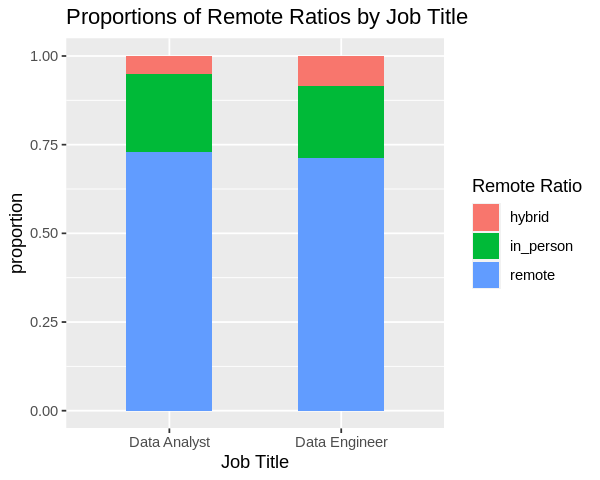

In [216]:
options(repr.plot.width = 5, repr.plot.height = 4)

remote_dist <- anlst_engr %>%
    ggplot(aes(x = job_title, fill = remote_ratio)) +
    geom_bar(position = "fill", width = 0.5) +
    labs(x = "Job Title", y = "proportion",
         title = "Proportions of Remote Ratios by Job Title", 
         fill = "Remote Ratio")

remote_dist

We can see a clear difference between the proportion of Data Analysts working hybrid, and that of Data Engineers doing the same.

### Estimates

Now, lets calculate our estimators.

In [264]:
sample_est <- anlst_engr %>%
    group_by(job_title) %>%
    summarize(n = n(),
              med_salary = median(salary_in_usd),
              sd_salary = sd(salary_in_usd), 
              prop_hybrid = mean(remote_ratio == "hybrid"))

head(sample_est)

job_title,n,med_salary,sd_salary,prop_hybrid
<chr>,<int>,<dbl>,<dbl>,<dbl>
Data Analyst,96,90660,39258.60,0.05208333
Data Engineer,129,108800,57349.85,0.08527132


## Methods: Plan

### Expected Outcomes and Significance

### Future

With the observations we are analyzing and comparing, we are only scratching the surface of all that there is to be examined. The possibilities are endless. For example, another question worth answering with this same dataset is how does remote ratio affect salary? 

We hope further research can be conducted comparing different variables further along with assessment on how salary impacts wellbeing and job satisfaction for both parties (the employer and employee) and along multiple industries.

## References

Card, D., Mas, A., Moretti, E., & Saez, E. (2012). Inequality at Work: The Effect of Peer Salaries on Job Satisfaction. American Economic Review, 102(6), 2981–3003. https://doi.org/10.1257/aer.102.6.2981

Lee, Y., & Sabharwal, M. (2014). Education–Job Match, Salary, and Job Satisfaction Across the Public,, Non-Profit, and For-Profit Sectors: Survey of recent college graduates. Public Management Review, 18(1), 40–64. https://doi.org/10.1080/14719037.2014.957342